**Setting up tensorflow 1.13.* for keras**


*   Free up space
*   install cuda 8
*   install tensorflow 1.13.*
*   install keras 2.2.*





In [1]:
!rm -rf /tensorflow-1.15.2
!rm -rf /usr/lib/python2.7
!rm -rf /usr/lib/python3.8
!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb; 4
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb;
!apt-key add /var/cuda-repo-8-0-local-ga2/7fa2af80.pub;
!apt-get update -qq;
!apt-get install cuda gcc-5 g+±5 -y -qq;
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc;
!ln -s /usr/bin/g+±5 /usr/local/cuda/bin/g++;
!apt install cuda-8.0;
!export LD_LIBRARY_PATH=/usr/local/cuda-8.0/lib64
!pip install tensorflow-gpu==1.13.*
!pip install keras==2.2.*

65 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2020-04-20 04:44:00--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?b6NRFexuQhLWZfGzwt44dx3CHW3chEOrccl16bTXlH1HpH7rGqxGHJGDCSVfdh9SDcpIarlBTjX8oWvSw-NFMu6Sh0sz3mwNi_7okAjoibUaBtDTngU0oH3YBHmeUs-9p-1-pJyETXNQdt1y_b4Y1D0tk-rrbkka1SRTftePF_xjYCBqzULwZJQNMGpRdb1gqEynKuNMjQ67kKZm9cIlixxllw [following]
--2020-04-20 04:44:00--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?b6NRFexuQhLWZfGzwt44dx3CHW3c

**Mount drive with colab and load data to drive**

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Import Libararies**

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.models import load_model

**Create test train sets from the data**

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


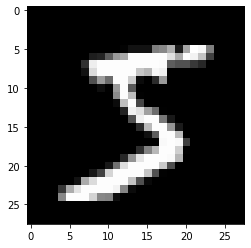

In [13]:
plt.imshow(X_train[0], cmap='gray')

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
X_train.shape

(60000, 784)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [0]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [18]:
K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 83us/step - loss: 0.3303 - acc: 0.8984 - val_loss: 0.1539 - val_acc: 0.9532
Epoch 2/10
42000/42000 [==============================] - 1s 31us/step - loss: 0.1117 - acc: 0.9663 - val_loss: 0.1340 - val_acc: 0.9613
Epoch 3/10
42000/42000 [==============================] - 1s 32us/step - loss: 0.0718 - acc: 0.9781 - val_loss: 0.1085 - val_acc: 0.9722
Epoch 4/10
42000/42000 [==============================] - 1s 34us/step - loss: 0.0532 - acc: 0.9837 - val_loss: 0.1304 - val_acc: 0.9664
Epoch 5/10
42000/42000 [==============================] - 1s 32us/step - loss: 0.0415 - acc: 0.9875 - val_loss: 0.0997 - val_acc: 0.9728
Epoch 6/10
42000/42000 [==============================] - 1s 32us/step - loss: 0.0298 - acc: 0.9911 - val_loss: 0.1338 - val_acc: 0.9694
Epoch 7/10
42000/42000 [==============================] - 1s 31us/step - loss: 0

Text(0.5, 0, 'Epochs')

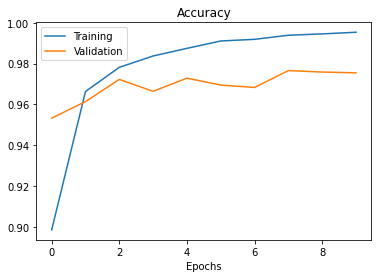

In [20]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [0]:
model.save("/content/gdrive/My Drive/deep-learning-vinsmon/mnist_with_ann_model.h5")

In [0]:
mymodel = load_model("/content/gdrive/My Drive/deep-learning-vinsmon/mnist_with_ann_model.h5")

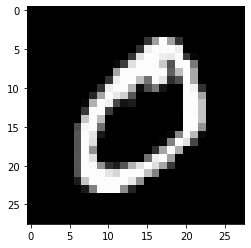

In [39]:
plt.imshow(X_train[1].reshape(28, 28), cmap='gray')

In [40]:
ans = mymodel.predict(np.array([X_train[1]]))
pred = np.argmax(ans)
pred

0